In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\U7W20E6\AppData\Local\Temp/ipykernel_3088/3795054502.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Create data

In [2]:
data = np.random.randint(-10, 10, (2000, 2))
labels = (data[:, 0] + data[:, 1]).reshape((2000, 1))
print(data.shape)
print(labels.shape)
dataT = torch.tensor(data).float()
labelsT = torch.tensor(labels).float()

train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, test_size=.1)

train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

batchsize = 64
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True,drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

(2000, 2)
(2000, 1)


# Create the model

In [3]:
class AddingModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = F.relu(self.input(x))
        return self.output(x)

In [7]:
def model_train(train_loader, test_loader):
    epochs = 50

    addModel = AddingModel()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(addModel.parameters(), lr=0.05)

    losses = []
    train_acc = []
    test_acc = []

    for _ in range(epochs):
        batch_acc = []
        batch_loss = []

        addModel.train()

        for X, y in train_loader:
            y_pred = addModel(X)
            loss = loss_function(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_loss.append(loss.item())
            batch_acc.append(np.corrcoef(y.detach().numpy().T, y_pred.detach().numpy().T)[0, 1])
            # batch_acc.append(np.corrcoef(y, y_pred.detach()[:, 0])[0, 1])
        
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))

        addModel.eval()
        X, y = next(iter(test_loader))
        with torch.no_grad():
            y_pred = addModel(X)
        test_acc.append(np.corrcoef(y.detach().numpy().T, y_pred.detach().numpy().T)[0, 1])
        # test_acc.append(np.corrcoef(y, y_pred.detach()[:, 0])[0, 1])
    return addModel, losses, train_acc, test_acc

In [8]:
for i in range(10):
    model, losses, train_acc, test_acc = model_train(train_loader, test_loader)
    print(f"Model instance {i}, final train/test accuracies: {100*train_acc[-1]:1f}%, {100*test_acc[-1]:1f}%")

Model instance 0, final train/test accuracies: 100.000000%, 100.000000%
Model instance 1, final train/test accuracies: 99.963377%, 99.963859%
Model instance 2, final train/test accuracies: 100.000000%, 100.000000%
Model instance 3, final train/test accuracies: 100.000000%, 100.000000%
Model instance 4, final train/test accuracies: 99.954053%, 99.964287%
Model instance 5, final train/test accuracies: 100.000000%, 100.000000%
Model instance 6, final train/test accuracies: 99.957763%, 99.966686%
Model instance 7, final train/test accuracies: 100.000000%, 100.000000%
Model instance 8, final train/test accuracies: 100.000000%, 100.000000%
Model instance 9, final train/test accuracies: 99.982990%, 99.984220%


Text(0.5, 1.0, 'Test accuracy')

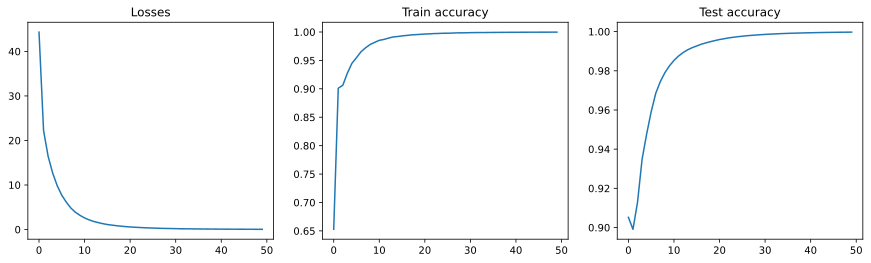

In [11]:
model, losses, train_acc, test_acc = model_train(train_loader, test_loader)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.plot(losses)
ax1.set_title("Losses")
ax2.plot(train_acc)
ax2.set_title("Train accuracy")
ax3.plot(test_acc)
ax3.set_title("Test accuracy")

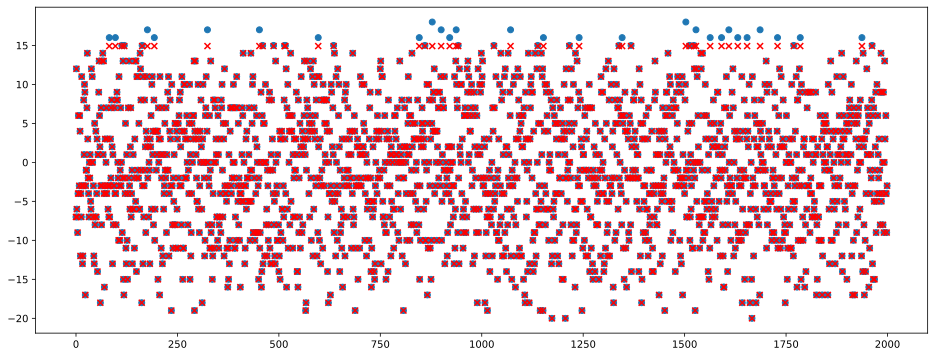

In [12]:
y_pred = model(dataT).detach().numpy()
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.scatter(np.arange(len(labels)), labels)
ax.scatter(np.arange(len(y_pred)), y_pred, c="r", marker="x")